# **Mushroom Classification**
Classification of mushrooms into edible and poisonous.


---






In [ ]:
import numpy as np
import pandas as pd
import os # to interact with the operating system
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.tail() # View the last 5 rows of the dataset.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


### **Visualize the DataSet**

---



In [ ]:
class_counts = df['class'].value_counts()

# class count
print("Class Distribution:")
print(class_counts)

# Class percentage
class_percentages = df['class'].value_counts(normalize=True) * 100
print("\nClass Percentages:")
print(class_percentages)


Class Distribution:
class
0    4208
1    3916
Name: count, dtype: int64

Class Percentages:
class
0    51.797144
1    48.202856
Name: proportion, dtype: float64


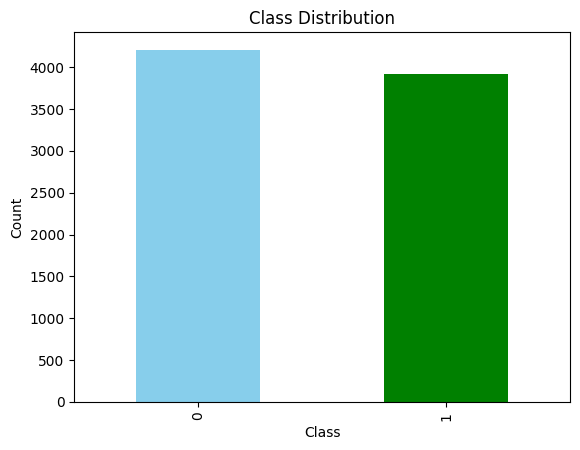

In [ ]:
import matplotlib.pyplot as plt

# Plot class distribution
class_counts.plot(kind='bar', color=['skyblue', 'green'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
df.shape # Gives the number of rows and columns.

(8124, 23)

In [ ]:
print("No of Rows",df.shape[0])
print("No fo Columns",df.shape[1])

No of Rows 8124
No fo Columns 23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### **Handling Null/Missing Values**
---

In [ ]:
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
df.describe() # statistical summaries

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.dtypes # data types

,0
class,object
cap-shape,object
cap-surface,object
cap-color,object
bruises,object
odor,object
gill-attachment,object
gill-spacing,object
gill-size,object
gill-color,object


In [ ]:
# Convert all object columns to categorical for optimization
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

In [ ]:
df.dtypes

,0
class,category
cap-shape,category
cap-surface,category
cap-color,category
bruises,category
odor,category
gill-attachment,category
gill-spacing,category
gill-size,category
gill-color,category


### **Handling Categorical Variables**
---

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Label Encoding for the Target Column (binary)
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

In [ ]:
categorical_cols = df.columns[df.columns != 'class']

# oneHot encoding since all features are nominal (has no order)
encoder = ColumnTransformer(
    transformers=[
        ('categorical', OneHotEncoder(), categorical_cols)  # Apply OneHotEncoding to the categorical columns
    ])

In [ ]:
# Apply the Encoding to the Data
X_features = df.drop('class', axis=1)  # Drop the target column
X_encoded = encoder.fit_transform(X_features)

In [ ]:
print(X_encoded.shape)

(8124, 117)


In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
x = df.drop('class',axis =1 ) #input features (axis = 1 for dropping columns)
y = df['class'] # target variable

In [ ]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


### **Dimensionality Reduction**
---

In [ ]:
from sklearn.decomposition import PCA  # Principle Component Analysis module for dimensionality reduction
pca1 = PCA(n_components=10)  # Creating a PCA object that summarizes 10 components
pca_fit = pca1.fit_transform(X_encoded)  # Applying PCA to the encoded feature matrix

### **Train Test Split**
---

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_fit, df['class'], test_size=0.20, random_state=42)

In [ ]:
y_train

,class
7873,1
6515,1
6141,1
2764,0
438,0
...,...
5226,1
5390,0
860,0
7603,1


### **Training Models**


---



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)  # Train the Decision Tree model

rm = RandomForestClassifier()
rm.fit(X_train, y_train)  # Train the Random Forest model

RandomForestClassifier()

In [ ]:
y_pred4 = dt.predict(X_test)  # Decision Tree predictions
y_pred5 = rm.predict(X_test)

### **Evaluation Metrics**


---



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred4)

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred5)

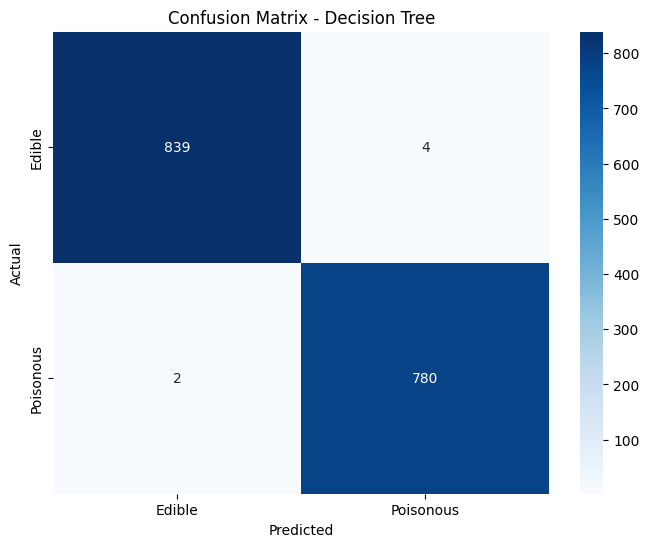

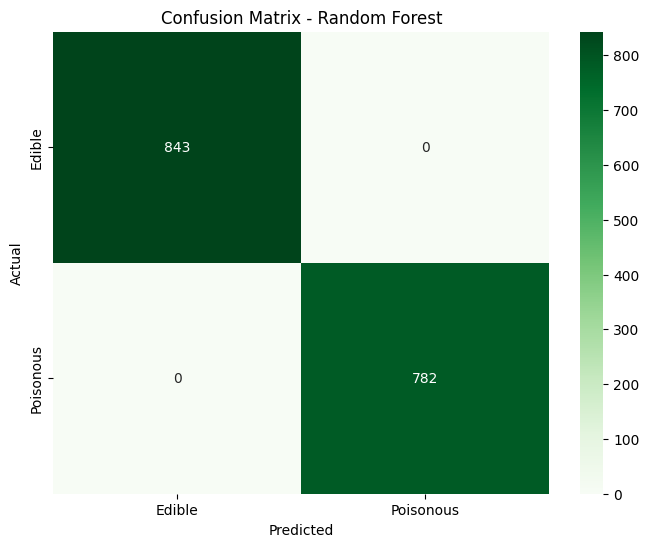

In [ ]:
# Visualization for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Visualization for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Decision Tree Accuracy
accuracy_dt = accuracy_score(y_test, y_pred4)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Random Forest Accuracy
accuracy_rf = accuracy_score(y_test, y_pred5)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for Decision Tree
precision_dt = precision_score(y_test, y_pred4, average='binary')  # Assuming binary classification
recall_dt = recall_score(y_test, y_pred4, average='binary')

# Calculate precision and recall for Random Forest
precision_rf = precision_score(y_test, y_pred5, average='binary')
recall_rf = recall_score(y_test, y_pred5, average='binary')

print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")

Decision Tree Accuracy: 0.9963
Random Forest Accuracy: 1.0000
Decision Tree Precision: 0.9949
Decision Tree Recall: 0.9974
Random Forest Precision: 1.0000
Random Forest Recall: 1.0000


### **Cross Validation**

---



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross-validation for Decision Tree
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Decision Tree Mean CV Score:", dt_scores.mean())

Decision Tree Cross-Validation Scores: [0.99769231 1.         0.99923077 0.99692308 0.99846035]
Decision Tree Mean CV Score: 0.9984613015929413


In [ ]:
# Cross-validation for Random Forest
rm = RandomForestClassifier()
rm_scores = cross_val_score(rm, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Scores:", rm_scores)
print("Random Forest Mean CV Score:", rm_scores.mean())

Random Forest Cross-Validation Scores: [0.99846154 1.         1.         1.         1.        ]
Random Forest Mean CV Score: 0.9996923076923077




---



### ***HYPERPARAMETER TUNING - NEGLECTED***


---



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the hyperparameter grid for the Decision Tree
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']           # The function to measure the quality of a split
}

# Set up GridSearchCV to find the best hyperparameters for DecisionTreeClassifier
dt_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),  # Initialize a Decision Tree classifier with fixed random state for reproducibility
    param_grid=dt_param_grid,                           # Provide the hyperparameter grid to search
    cv=5,                                               # Use 5-fold cross-validation for evaluation
    scoring='accuracy'                                  # Optimize for accuracy metric
)

# Perform grid search with the training data
dt_grid_search.fit(X_train, y_train)                    # Train the model and perform cross-validation on X_train and y_train

# Retrieve the best model after grid search
best_dt = dt_grid_search.best_estimator_               # Get the model with the best combination of hyperparameters


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define the hyperparameter grid for the Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest; higher values improve performance but increase computation
    'max_depth': [None, 10, 20, 30],         # Maximum depth of each tree (None means unlimited depth)
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be a leaf node
    'bootstrap': [True, False]               # Whether to sample with replacement (True) or without replacement (False)
}

# Set up GridSearchCV to find the best hyperparameters for RandomForestClassifier
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),  # Initialize a Random Forest with fixed random state for reproducibility
    param_grid=rf_param_grid,                           # Provide the hyperparameter grid to search
    cv=5,                                               # Use 5-fold cross-val idation for evaluation
    scoring='accuracy'                                  # Optimize for accuracy metric
)

# Perform grid search with the training data
rf_grid_search.fit(X_train, y_train)                    # Train the model and perform cross-validation on X_train and y_train

# Retrieve the best model after grid search
best_rf = rf_grid_search.best_estimator_               # Get the Random Forest model with the best combination of hyperparameters


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,

)

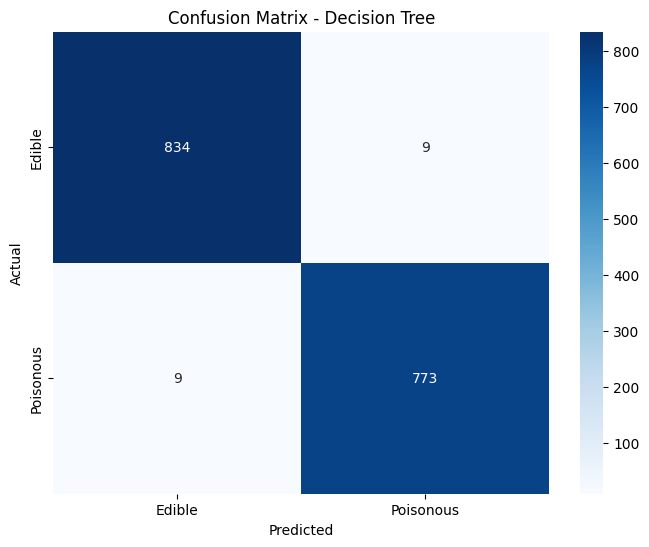

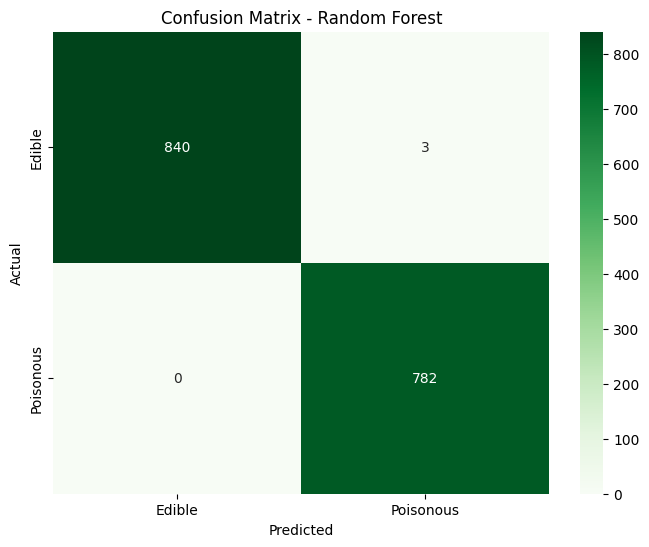

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrices for Decision Tree and Random Forest models
conf_matrix_dt = confusion_matrix(y_test, dt_predictions)
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)

# Visualization for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Visualization for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()
